## Data Generation

In [4]:
import pandas as pd
import numpy as np
from faker import Faker

fake = Faker()

# Define product names for each category
product_names = {
    'Electronics': ['Smartphone', 'Laptop', 'Tablet', 'Headphones', 'Camera'],
    'Clothing': ['T-shirt', 'Jeans', 'Jacket', 'Dress', 'Sneakers'],
    'Grocery': ['Milk', 'Bread', 'Eggs', 'Fruits', 'Vegetables'],
    'Furniture': ['Chair', 'Table', 'Sofa', 'Bed', 'Bookshelf'],
    'Sports': ['Football', 'Basketball', 'Tennis Racket', 'Golf Club', 'Yoga Mat'],
    'Books': ['Novel', 'Biography', 'Comics', 'Cookbook', 'Textbook']
}

# Define a list of specific domain names
ecommerce_domains = ['Amazon', 'Flipkart', 'Myntra', 'eBay', 'Meesho']

# Define a list of specific countries
countries = ['United States', 'India', 'Germany', 'Australia', 'Canada', 'Brazil']

def generate_data(num_records, rogue_probability=0.2):  # Increased rogue probability
    data = []
    for _ in range(num_records):
        # Select a random product category
        product_category = fake.random_element(elements=list(product_names.keys()))
        
        # Select a random product name from the chosen category
        product_name = fake.random_element(elements=product_names[product_category])
        
        # Determine payment success or failure
        payment_success = fake.random_element(elements=('Y', 'N'))
        
        # Create a standard record
        record = {
            'order_id': fake.uuid4(),
            'customer_id': fake.uuid4(),
            'customer_name': fake.name(),
            'product_id': fake.uuid4(),
            'product_name': product_name,
            'product_category': product_category,
            'payment_type': fake.random_element(elements=('card', 'Internet Banking', 'UPI', 'Wallet')),
            'qty': np.random.randint(1, 10),
            'price': round(np.random.uniform(10, 500), 2),
            'datetime': fake.date_time_this_decade(),
            'country': fake.random_element(elements=countries),  # Choose from specific countries
            'city': fake.city(),
            'ecommerce_website_name': fake.random_element(elements=ecommerce_domains),
            'payment_txn_id': fake.uuid4(),
            'payment_txn_success': payment_success,
            'failure_reason': fake.sentence() if payment_success == 'N' else None
        }
        
        # Introduce rogue records based on the probability
        if np.random.rand() < rogue_probability:
            # Apply multiple rogue changes to the record
            rogue_fields = fake.random_choices(elements=['qty', 'price', 'payment_type', 'country'], length=2)
            
            if 'qty' in rogue_fields:
                record['qty'] = np.random.choice([-1, 0, 1000])  # Invalid quantities
            if 'price' in rogue_fields:
                record['price'] = np.random.choice([-100, 0])  # Invalid prices
            if 'payment_type' in rogue_fields:
                record['payment_type'] = 'Unknown'  # Invalid payment type
            if 'country' in rogue_fields:
                record['country'] = 'Unknown'  # Invalid country
        
        data.append(record)
    
    return pd.DataFrame(data)

# Generate the data and save it to a CSV file
df = generate_data(10000)
df.to_csv('generated_data2.csv', index=False)


## Loading the Data

In [5]:
import pandas as pd

# Specify the file path
file_path = 'generated_data2.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,order_id,customer_id,customer_name,product_id,product_name,product_category,payment_type,qty,price,datetime,country,city,ecommerce_website_name,payment_txn_id,payment_txn_success,failure_reason
0,ac8d6c13-a007-4f84-bf05-55c7bc37c321,0b9932e4-2995-4ae3-99d8-81c4d0864b52,Michael Fields,0b313d3c-7816-40f8-bc9c-5f2d3d18cc60,Sneakers,Clothing,Unknown,8,76.01,2022-11-03 14:58:24,Unknown,Port Richard,Amazon,e6f1b928-b41e-4cb5-97b3-eb7ca10ad678,Y,NaN
1,cdda7b20-62b0-41f3-a3dd-36b342ea268e,3c1e13ec-febe-47f7-8a25-205ea800c674,Stephanie King,8ea9ccfd-0bbb-4a1c-8d95-23d410622c80,Fruits,Grocery,card,5,173.42,2024-08-02 13:53:36,India,Jasonville,Meesho,6aaf036e-cbea-4134-b2ae-d04caae1c138,N,Nature main boy media next development.
2,1aababc5-56df-4afe-8021-99d2bbccd018,2ac10951-a2dc-4761-bde4-981db92d980f,Charles Quinn,09c93498-d946-487d-81d5-4d11d3206655,Sofa,Furniture,card,6,409.98,2024-01-23 08:28:22,Brazil,Port Melissamouth,Flipkart,1c8077f5-18f8-44c6-8bff-ea5ced09eb35,N,Right deal area parent especially example meet.
3,ee653c17-1d46-41de-bb7c-7cb4a76dbce8,e8716d20-ef13-4d34-b933-e18cf70408a6,Sheryl Ballard,0aa7832f-1179-490c-875e-8d6f5b6f3705,T-shirt,Clothing,Wallet,6,129.79,2023-01-11 19:03:18,Australia,Sellerstown,eBay,762a8bfa-6e34-46fc-95a2-972ada829a46,N,Just central anyone activity.
4,6cfb55db-6c51-45d5-b252-53981084cdb6,522dd196-675b-4fae-b5b8-d4d9ebf35163,Cheyenne Hamilton,af4a5c43-b56d-4250-a27c-9e10a1eac372,Milk,Grocery,UPI,9,108.76,2023-09-03 03:29:37,Australia,West Colleenview,Myntra,cf8e8c6d-f0a6-488a-8e0a-33062c04827e,Y,NaN


## Data Exploration

### Summary of the DataFrame:


In [6]:
df.info()
#This provides a concise summary, including the number of non-null entries in each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                10000 non-null  object 
 1   customer_id             10000 non-null  object 
 2   customer_name           10000 non-null  object 
 3   product_id              10000 non-null  object 
 4   product_name            10000 non-null  object 
 5   product_category        10000 non-null  object 
 6   payment_type            10000 non-null  object 
 7   qty                     10000 non-null  int64  
 8   price                   10000 non-null  float64
 9   datetime                10000 non-null  object 
 10  country                 10000 non-null  object 
 11  city                    10000 non-null  object 
 12  ecommerce_website_name  10000 non-null  object 
 13  payment_txn_id          10000 non-null  object 
 14  payment_txn_success     10000 non-null 

### Checking for Missing Values:


In [7]:
df.isnull().sum()
#This reveals the total number of missing values per column

order_id                     0
customer_id                  0
customer_name                0
product_id                   0
product_name                 0
product_category             0
payment_type                 0
qty                          0
price                        0
datetime                     0
country                      0
city                         0
ecommerce_website_name       0
payment_txn_id               0
payment_txn_success          0
failure_reason            5030
dtype: int64

### Unique Values Exploration

In [8]:
df.nunique()
#This shows the number of unique values per column.

order_id                  10000
customer_id               10000
customer_name              9382
product_id                10000
product_name                 30
product_category              6
payment_type                  5
qty                          12
price                      8320
datetime                  10000
country                       7
city                       7726
ecommerce_website_name        5
payment_txn_id            10000
payment_txn_success           2
failure_reason             4970
dtype: int64

### Detecting Rogue Values

In [9]:
#Identifying Rogue Quantities:
df[df['qty'] <= 0]

,order_id,customer_id,customer_name,product_id,product_name,product_category,payment_type,qty,price,datetime,country,city,ecommerce_website_name,payment_txn_id,payment_txn_success,failure_reason
23,c67b47d6-210f-4f66-a7ff-8805493623b1,db0d9659-8304-444c-aa21-a8bae995ede2,Alyssa Armstrong,3ea9eac5-315f-45ba-8396-61fb4ee824c0,Novel,Books,UPI,0,133.61,2021-08-07 06:07:27,India,Jacquelineside,eBay,2ac8fcc5-1961-4b00-8b02-5d1f4d8cb971,N,Decide one house off church.
26,ed676dda-b622-4340-8320-2aacf7cb9087,8e6c81d4-d79b-4b92-aa3e-054ddd75f088,Raymond Sparks,bd28d376-7a92-4af8-b6f7-ee04b81d2be7,Golf Club,Sports,card,-1,234.98,2023-11-01 05:19:55,Unknown,North Megantown,Flipkart,d4d8eb3b-2655-42e9-90c0-024d70662f6d,N,Animal series possible later president.
69,7b22db64-ad10-4c76-8b9f-69f26ca5e5af,d7211574-8b0a-4371-a370-7b8c9257739e,Derrick Mcbride,64dee09e-b452-4882-9305-1d615765e000,Bed,Furniture,UPI,0,463.32,2020-05-11 07:49:53,Unknown,East Nicholas,Myntra,1eb573d5-50dd-48c5-bf55-924c51b4c88f,Y,NaN
78,87163b90-b796-4be2-b5ab-a65dd9768923,9c094723-506d-4fe9-af6f-26151e9d60b0,Michael Walker,c613cda8-b5d2-4fa5-b8a1-2be1e41b667e,Table,Furniture,card,-1,231.72,2020-07-29 22:15:00,Brazil,North Joelburgh,Myntra,061963e0-a02b-4e6e-acc4-8e189b0d7241,Y,NaN
82,9be80464-6b10-4252-876e-807862a01dda,e4747e3e-f568-426e-95b6-280b94abba2b,Rebecca Russell,8bd8d169-3a91-4ec0-abd9-0f4ff20d9dbc,Tennis Racket,Sports,Internet Banking,0,147.76,2020-03-11 09:36:30,Unknown,East Melissa,Amazon,7be3acf8-395a-430b-b11f-94f66ebea7be,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9919,7391366a-fdd5-4935-a523-494301192486,3dea772e-bdcb-4e76-be3a-1fa5e4bcce57,Melissa Rogers,787c1c6e-71b1-4d8d-b3fe-d329b6fef0f1,Jeans,Clothing,Unknown,0,72.94,2024-07-09 06:16:46,Brazil,Abbottburgh,eBay,a09826f4-ef93-4785-be62-d65df298a56e,Y,NaN
9937,9b2d251e-ef7b-4526-9bef-994353c64743,0f9e4d4f-236b-4b55-b645-2c83c61a8b6b,Michael James DDS,2e6d242e-86dd-45fa-9020-3c58b6e11847,Cookbook,Books,Unknown,0,90.50,2024-02-20 11:36:27,Canada,Andersonton,eBay,2a1b7a0f-8300-4883-96e3-aa0e9fc657b0,N,Than perhaps mother air election.
9938,0efc103a-39b8-4e39-9e3a-fa3a23864cd3,d8389e32-516a-4e17-9eff-755ebbc14519,Charles Bass,6dce0618-c7bd-418c-adcf-7e363935c134,Dress,Clothing,Unknown,-1,422.89,2024-02-17 10:00:48,Canada,New Bethland,Flipkart,1010faca-d700-47fc-9d21-58e72a29e148,N,Agreement avoid once suggest great natural store.
9939,665b8885-297f-4546-9be3-4a07d2fe0476,efbf7d81-0f7b-4e95-86c1-463fe6ba47a9,Brian Hill,81376d0d-0af7-4755-8e37-b6300eac7e68,Biography,Books,Wallet,0,444.91,2024-08-10 10:34:06,Unknown,Scottview,Myntra,1030a712-abaa-4825-871d-c279e310d2aa,N,Drug development second program personal examp...


In [10]:
#Identifying Rogue Quantities:
df[df['qty'] > 100]
#This helps in spotting records where the quantity is either negative, zero, or unusually high.

,order_id,customer_id,customer_name,product_id,product_name,product_category,payment_type,qty,price,datetime,country,city,ecommerce_website_name,payment_txn_id,payment_txn_success,failure_reason
39,1f89832e-3ff5-437e-a294-fe991852e670,5c7ab49c-753f-47fc-8b98-47a80fa99462,Randy Bailey,90b3fe30-6dc9-47ad-b4e1-797e78dfd4bd,Headphones,Electronics,card,1000,290.57,2020-07-08 14:11:03,United States,Port Stephanie,Myntra,12c57cd9-d6ff-4457-ad50-70b590ff3b70,Y,NaN
50,108b635d-0ee7-4503-874e-c34ab05eabae,8a86e525-93dd-47df-822a-560d0a9f0dac,Douglas Cameron,e7ad9e62-7733-44c5-9f0f-dcff29f968b3,Smartphone,Electronics,Wallet,1000,392.16,2021-01-26 21:49:01,Unknown,Williamchester,Amazon,aa272e74-9139-4d56-b376-141bd29c723a,N,Short school need economic run.
59,97bb2cdb-e61c-4480-8516-7f5b0d065699,9864a2a3-babb-48fa-af0b-48478e0bf9c0,Anthony Hicks,c02d4a84-ed54-487b-b895-68eaf554c371,Table,Furniture,card,1000,463.89,2024-06-13 16:28:56,Unknown,New Scott,eBay,fea6015e-07f3-4eae-ba12-699f979f7cd0,N,Population since tell major question.
77,c59d6fa2-5804-4ee8-8f5d-7faf6a9cd71f,c665723b-178e-400f-ad4b-7080dcea0d76,Matthew Gonzales,68bc1724-fefc-41e3-b934-ea7385222b13,Sofa,Furniture,UPI,1000,198.18,2021-05-26 17:16:32,Unknown,North Kristen,Meesho,cabad116-9294-4273-ae6e-d881be6e6599,N,Quickly because I southern.
80,6c73c52d-05b5-498f-985d-6af98d48ceaf,3ed644f7-c302-4fa0-9889-1d1fdcde0de7,Gregory Johnson,d1dd55c5-2ed1-46d6-b9b2-2a5334085a9e,Bookshelf,Furniture,UPI,1000,153.84,2020-02-02 12:24:11,Unknown,North Amberberg,Amazon,341a4db4-d491-4081-b53b-3e9f868e4a74,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9701,c6dda290-5ed9-4794-b1a6-1b92e11f5dba,a5f48e7c-504c-4b1a-8275-59531bc3be5a,Brett Campbell,47c40147-a4df-45db-815a-3e3f4e016c9e,Textbook,Books,Unknown,1000,198.63,2022-05-15 08:26:37,India,Port Mindyville,Myntra,b0aa244c-521f-4099-9bef-a791773c7db1,N,And several eight network.
9726,2476772a-8860-4661-ab62-d51245d8823e,a6a9c069-b9df-4bdc-91dd-61ff1b088f8f,Laura Terrell,a6fa3315-2c4f-45d2-b575-c186108dec95,Table,Furniture,Unknown,1000,411.04,2022-01-21 21:27:56,Canada,Allenbury,eBay,7beae0a5-99eb-4d99-bc98-bc177995268d,Y,NaN
9732,94f17c18-19b1-426a-a4dc-177be6589669,8bb59d2b-2b43-408e-a797-d8363487f97c,Derek Myers,4ceca923-df1c-4238-8ba4-35e88b589e3d,Cookbook,Books,Unknown,1000,25.68,2023-10-02 20:17:58,Australia,Jonesstad,Myntra,51bd68f2-ae1e-4a2f-ae7b-050262d72d14,N,First manage hair cover hospital.
9756,5b162bc8-ffcf-4e6c-b179-107958ffe85d,9f11fb84-c6c2-4af0-b69b-1394a4f2f8ce,Chad Cooke,16629249-ac43-4908-a828-7ac740266403,Basketball,Sports,Unknown,1000,435.09,2021-06-05 03:41:46,Germany,Rogersport,Myntra,4d9f9633-3357-4b13-8af1-1dc36101b2f7,N,Officer research treatment should several.


### Identifying Rogue Prices

In [11]:
df[df['price'] <= 0]
#This finds records where the price is either zero or negative.

,order_id,customer_id,customer_name,product_id,product_name,product_category,payment_type,qty,price,datetime,country,city,ecommerce_website_name,payment_txn_id,payment_txn_success,failure_reason
5,97d27258-bbdf-4de0-9b62-5f4b0f9757bd,430ba1c4-a577-4fa9-b74e-4979313eb829,Gary Beltran II,0a729b12-c612-4e51-8437-0024adcc8e5c,T-shirt,Clothing,Unknown,6,-100.0,2023-12-19 11:05:46,Canada,Jenkinsport,Amazon,d1e5ade4-cad0-4048-83b8-9fa6d1005664,N,Student dog sister popular.
25,7ccb5c19-a115-4f1a-964f-ed5a1d60c911,9f22931e-e912-46e6-91d3-29f66004e538,Kevin Lee,016d0aac-0240-41f1-a7ad-ddbe92bc6202,Jacket,Clothing,Internet Banking,1,-100.0,2021-03-01 20:49:08,Unknown,Toddberg,Amazon,110642e1-eb36-4a5f-acc6-4c423a0de6cd,Y,NaN
29,f79f5fb3-85b5-4f66-a558-c5832737dc05,16ee6684-4ebd-4911-8ae2-e0fb514dc191,Melanie Liu,6a5e4a95-23ba-42c4-b1c0-d9e175f848b0,Table,Furniture,Unknown,1,-100.0,2024-08-10 04:43:13,Germany,North Zacharychester,Flipkart,937fb4b7-1e7f-47aa-8cbd-083b17d7bc24,N,City instead spend fall me wide.
56,161c6457-b785-44bd-9f9f-e8e626e4e2b1,a8634c3f-c8d3-4d87-be45-a3a87077241f,Anthony Pruitt,66b40a32-7688-4c25-b1ef-b68c8141a028,Sofa,Furniture,Unknown,8,-100.0,2023-01-06 06:46:31,Germany,South Jeffery,Myntra,02bda9b0-ca3a-4f33-8cb8-687dfa4a8bbd,Y,NaN
63,b7e890c0-c317-4e0f-8bc0-358c87f52728,8b75acf9-e2fb-46f4-ba51-de93183fc3d8,Rachel Mooney,8ff922ac-183e-4eab-a6b0-11177a83f120,T-shirt,Clothing,Unknown,6,-100.0,2021-01-27 11:04:53,Australia,Michellechester,Flipkart,a3c1bd2b-8542-4b6b-b190-b140942e8944,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9958,c698ed20-8155-4cc8-ac53-5c501473d48e,c41bb00f-6802-4625-834d-85aa0c5af5be,Scott Bell,5447eaab-6819-45fc-8679-f49673a14759,Eggs,Grocery,Unknown,7,0.0,2021-06-10 19:14:23,Australia,Port Anthonychester,eBay,51ac5132-c624-4372-abe6-5b729f604d50,N,Notice test adult available social data public.
9962,0081769d-d2ce-4692-916e-f58f000e8991,f6be59bf-a851-4b09-8f3c-d58ca7fed7e5,Herbert Lopez,ca5382fe-f4e4-4882-bfd3-917c6085fa93,Sofa,Furniture,Unknown,1,0.0,2020-12-26 20:09:45,Australia,Port Derricktown,Meesho,2a807575-ab1f-47a3-bc3c-71d320d63df7,N,Near first rise.
9973,bd652293-1749-4e74-aa0b-670668c81756,a285407e-e8a5-40fe-b44a-109f89601aa5,John Good,4f746000-3750-427b-ac1b-ae49f318c42c,Bread,Grocery,Unknown,1,0.0,2020-09-19 17:13:14,United States,New Susanshire,Flipkart,60bf773e-7d41-4ec0-bb31-cd3d67755ade,N,Society life loss special kid.
9981,eb2c2544-aa04-455c-b16c-6acd27043757,d4229270-8dd8-4efa-8836-c2cc27529a87,Joshua Fields,201f3a47-eb88-41a5-bca1-8796de307d49,Laptop,Electronics,Unknown,3,-100.0,2022-06-28 05:15:15,Canada,Lake Lauren,Meesho,e5ea8ddf-b90f-4ffd-9963-4082a0bb46f8,N,You avoid example available argue.


### Invalid Payment Types

In [12]:
df[df['payment_type'] == 'Unknown']

,order_id,customer_id,customer_name,product_id,product_name,product_category,payment_type,qty,price,datetime,country,city,ecommerce_website_name,payment_txn_id,payment_txn_success,failure_reason
0,ac8d6c13-a007-4f84-bf05-55c7bc37c321,0b9932e4-2995-4ae3-99d8-81c4d0864b52,Michael Fields,0b313d3c-7816-40f8-bc9c-5f2d3d18cc60,Sneakers,Clothing,Unknown,8,76.01,2022-11-03 14:58:24,Unknown,Port Richard,Amazon,e6f1b928-b41e-4cb5-97b3-eb7ca10ad678,Y,NaN
5,97d27258-bbdf-4de0-9b62-5f4b0f9757bd,430ba1c4-a577-4fa9-b74e-4979313eb829,Gary Beltran II,0a729b12-c612-4e51-8437-0024adcc8e5c,T-shirt,Clothing,Unknown,6,-100.00,2023-12-19 11:05:46,Canada,Jenkinsport,Amazon,d1e5ade4-cad0-4048-83b8-9fa6d1005664,N,Student dog sister popular.
29,f79f5fb3-85b5-4f66-a558-c5832737dc05,16ee6684-4ebd-4911-8ae2-e0fb514dc191,Melanie Liu,6a5e4a95-23ba-42c4-b1c0-d9e175f848b0,Table,Furniture,Unknown,1,-100.00,2024-08-10 04:43:13,Germany,North Zacharychester,Flipkart,937fb4b7-1e7f-47aa-8cbd-083b17d7bc24,N,City instead spend fall me wide.
34,448974a9-2a05-4700-9ebf-eb5ebcda1ae4,5cff18b1-fc88-4cb3-a5e1-5e86076a176c,Samantha Henson,9aec6235-12f3-4c71-8393-095cf754d114,Cookbook,Books,Unknown,8,145.67,2021-05-10 04:57:03,Unknown,New Julieside,Amazon,7e34e56e-2e5c-4498-9e56-ad984227ba6e,Y,NaN
52,be52224a-bd1a-4f49-a683-916057ea0727,7110fc26-a573-4f2a-8908-998995a8beef,Eric Smith,4d74b3a4-c268-444a-a19b-d606ccd83a61,Headphones,Electronics,Unknown,4,410.30,2022-03-08 07:43:25,Unknown,Marcusview,Meesho,a82ef9a2-ddff-45c3-85c6-ce93fcf38d69,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9959,4357f5d3-d7c7-4945-93dc-23e57b45a52b,cf09deaf-0409-434c-9ca9-01347e594fa6,Kimberly Wood,ddff6e0a-7abd-460b-a02b-8cdd26e2c892,Jacket,Clothing,Unknown,2,310.32,2022-06-06 08:22:11,Unknown,Deniseside,eBay,76bf65f2-3192-4048-9460-6b67c66ea022,N,Leave close follow someone.
9962,0081769d-d2ce-4692-916e-f58f000e8991,f6be59bf-a851-4b09-8f3c-d58ca7fed7e5,Herbert Lopez,ca5382fe-f4e4-4882-bfd3-917c6085fa93,Sofa,Furniture,Unknown,1,0.00,2020-12-26 20:09:45,Australia,Port Derricktown,Meesho,2a807575-ab1f-47a3-bc3c-71d320d63df7,N,Near first rise.
9973,bd652293-1749-4e74-aa0b-670668c81756,a285407e-e8a5-40fe-b44a-109f89601aa5,John Good,4f746000-3750-427b-ac1b-ae49f318c42c,Bread,Grocery,Unknown,1,0.00,2020-09-19 17:13:14,United States,New Susanshire,Flipkart,60bf773e-7d41-4ec0-bb31-cd3d67755ade,N,Society life loss special kid.
9976,a71c2efb-45b4-4afd-bc71-bca5f0fbbf98,d962a58a-981c-4613-bea6-e8aad3e8548c,Alicia Medina,f9ddf9eb-3957-444c-bbf8-9c7ccf67d7d5,Sofa,Furniture,Unknown,7,259.49,2024-05-30 12:14:42,Unknown,West Stephen,Myntra,d90ee247-38d8-485d-9073-47ee2bc98c13,Y,NaN


### Invalid  Countries:

In [13]:
df[df['country'] == 'Unknown']

,order_id,customer_id,customer_name,product_id,product_name,product_category,payment_type,qty,price,datetime,country,city,ecommerce_website_name,payment_txn_id,payment_txn_success,failure_reason
0,ac8d6c13-a007-4f84-bf05-55c7bc37c321,0b9932e4-2995-4ae3-99d8-81c4d0864b52,Michael Fields,0b313d3c-7816-40f8-bc9c-5f2d3d18cc60,Sneakers,Clothing,Unknown,8,76.01,2022-11-03 14:58:24,Unknown,Port Richard,Amazon,e6f1b928-b41e-4cb5-97b3-eb7ca10ad678,Y,NaN
25,7ccb5c19-a115-4f1a-964f-ed5a1d60c911,9f22931e-e912-46e6-91d3-29f66004e538,Kevin Lee,016d0aac-0240-41f1-a7ad-ddbe92bc6202,Jacket,Clothing,Internet Banking,1,-100.00,2021-03-01 20:49:08,Unknown,Toddberg,Amazon,110642e1-eb36-4a5f-acc6-4c423a0de6cd,Y,NaN
26,ed676dda-b622-4340-8320-2aacf7cb9087,8e6c81d4-d79b-4b92-aa3e-054ddd75f088,Raymond Sparks,bd28d376-7a92-4af8-b6f7-ee04b81d2be7,Golf Club,Sports,card,-1,234.98,2023-11-01 05:19:55,Unknown,North Megantown,Flipkart,d4d8eb3b-2655-42e9-90c0-024d70662f6d,N,Animal series possible later president.
31,fc4ccc2d-a3bc-4d53-a4c2-2ff690050acb,145c8e09-bd98-4e04-94e9-26c226a8c190,Brandon Greene,72bcb32c-5547-4f87-9918-76c46f71c7ff,Bread,Grocery,card,2,287.64,2024-05-28 10:05:03,Unknown,New Vickie,Amazon,1eb942d6-2ae3-4e4a-a0cc-04d82d128a34,N,World nice small.
34,448974a9-2a05-4700-9ebf-eb5ebcda1ae4,5cff18b1-fc88-4cb3-a5e1-5e86076a176c,Samantha Henson,9aec6235-12f3-4c71-8393-095cf754d114,Cookbook,Books,Unknown,8,145.67,2021-05-10 04:57:03,Unknown,New Julieside,Amazon,7e34e56e-2e5c-4498-9e56-ad984227ba6e,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9939,665b8885-297f-4546-9be3-4a07d2fe0476,efbf7d81-0f7b-4e95-86c1-463fe6ba47a9,Brian Hill,81376d0d-0af7-4755-8e37-b6300eac7e68,Biography,Books,Wallet,0,444.91,2024-08-10 10:34:06,Unknown,Scottview,Myntra,1030a712-abaa-4825-871d-c279e310d2aa,N,Drug development second program personal examp...
9941,3dfb7021-53c4-459d-b73d-7957c60674dd,23f5ca6c-e870-4828-b49d-a5042278b49e,Adam Ryan,aef0e52d-8fa2-4729-b284-f59fbeb31271,Laptop,Electronics,UPI,0,324.38,2020-05-18 17:40:42,Unknown,Stacietown,Meesho,893f2980-794d-4407-8ac4-ed162bcdf8e4,Y,NaN
9959,4357f5d3-d7c7-4945-93dc-23e57b45a52b,cf09deaf-0409-434c-9ca9-01347e594fa6,Kimberly Wood,ddff6e0a-7abd-460b-a02b-8cdd26e2c892,Jacket,Clothing,Unknown,2,310.32,2022-06-06 08:22:11,Unknown,Deniseside,eBay,76bf65f2-3192-4048-9460-6b67c66ea022,N,Leave close follow someone.
9976,a71c2efb-45b4-4afd-bc71-bca5f0fbbf98,d962a58a-981c-4613-bea6-e8aad3e8548c,Alicia Medina,f9ddf9eb-3957-444c-bbf8-9c7ccf67d7d5,Sofa,Furniture,Unknown,7,259.49,2024-05-30 12:14:42,Unknown,West Stephen,Myntra,d90ee247-38d8-485d-9073-47ee2bc98c13,Y,NaN


In [14]:
df[df['country'] == 'Unknown'].shape[0]

874

### Checking for Duplicate Records

In [15]:
df.duplicated().sum()


np.int64(0)

## Data cleaning

### Handle Invalid Quantities

In [16]:
#Replace invalid quantities with a median or a valid default value
median_qty = df['qty'].median()
df['qty'] = df['qty'].apply(lambda x: median_qty if x <= 0 or x > 100 else x)

In [17]:
df['qty']

0       8.0
1       5.0
2       6.0
3       6.0
4       9.0
       ... 
9995    3.0
9996    9.0
9997    9.0
9998    7.0
9999    4.0
Name: qty, Length: 10000, dtype: float64

### Handle Invalid Prices

In [18]:
#Replace invalid prices with the median or a valid default value
median_price = df['price'].median()
df['price'] = df['price'].apply(lambda x: median_price if x <= 0 else x)

In [19]:
df['price']

0        76.010
1       173.420
2       409.980
3       129.790
4       108.760
         ...   
9995     26.560
9996    240.740
9997    230.385
9998    419.310
9999    491.820
Name: price, Length: 10000, dtype: float64

### Handle Invalid Payment Types

In [20]:
#Replace invalid payment types with the mode (most common value)
mode_payment_type = df['payment_type'].mode()[0]
df['payment_type'] = df['payment_type'].replace('Unknown', mode_payment_type)

In [21]:
df['payment_type']

0          UPI
1         card
2         card
3       Wallet
4          UPI
         ...  
9995    Wallet
9996    Wallet
9997    Wallet
9998       UPI
9999      card
Name: payment_type, Length: 10000, dtype: object

### Handle Invalid Country Names

In [22]:
#Replace invalid country names with the mode (most common value)
mode_country = df['country'].mode()[0]
df['country'] = df['country'].replace('Unknown', mode_country)

In [23]:
df[df['country'] == 'Unknown'].shape[0]

0

### Handling Missing Values

In [24]:
# Fill missing values 
df['failure_reason'] = df['failure_reason'].fillna('No Failure')

In [25]:
df.to_csv('cleaned_data.csv', index=False)


## Data Analysis

### 1. Top-Selling Category of Items (Overall and Per Country)

In [26]:
#Overall Top-Selling Category
top_category_overall = df.groupby('product_category')['qty'].sum().sort_values(ascending=False).reset_index()
print("Overall Top-Selling Category:")
print(top_category_overall.head(1))

Overall Top-Selling Category:
  product_category     qty
0      Electronics  8588.0


In [27]:
#top-Selling Category Per Country
top_category_countries = df.groupby(['country', 'product_category'])['qty'].sum().reset_index()
# print(top_category_countries)
top_category_per_country = top_category_countries.sort_values( 'qty', ascending= False).drop_duplicates('country').reset_index()
print("Top-Selling Category Per Country:")
print(top_category_per_country)


Top-Selling Category Per Country:
   index        country product_category     qty
0      8         Brazil      Electronics  2096.0
1     12         Canada            Books  1452.0
2     30  United States            Books  1433.0
3     22        Germany          Grocery  1389.0
4      4      Australia          Grocery  1383.0
5     27          India        Furniture  1315.0


### 2. Popularity of Products Throughout the Year (Overall and Per Country)

In [28]:
#Overall Product Popularity Throughout the Year:
df['month'] = pd.to_datetime(df['datetime']).dt.month
df['year'] = pd.to_datetime(df['datetime']).dt.year
product_popularity_overall = df.groupby(['month', 'product_category'])['qty'].sum().unstack().fillna(0)
print("Product Popularity Throughout the Year (Overall):")
print(product_popularity_overall)


Product Popularity Throughout the Year (Overall):
product_category  Books  Clothing  Electronics  Furniture  Grocery  Sports
month                                                                     
1                 708.0     813.0        791.0      702.0    770.0   767.0
2                 584.0     723.0        688.0      689.0    729.0   667.0
3                 759.0     663.0        704.0      654.0    732.0   840.0
4                 732.0     687.0        888.0      772.0    813.0   685.0
5                 768.0     742.0        762.0      874.0    811.0   781.0
6                 740.0     623.0        801.0      629.0    685.0   760.0
7                 760.0     713.0        733.0      859.0    828.0   743.0
8                 727.0     735.0        718.0      773.0    663.0   641.0
9                 638.0     573.0        674.0      556.0    557.0   669.0
10                559.0     506.0        623.0      552.0    689.0   586.0
11                570.0     630.0        589.0    

In [29]:
#Product Popularity Per Country
product_popularity_per_country = df.groupby(['country','year', 'month', 'product_category'])['qty'].sum().unstack().fillna(0)
print("Product Popularity Per Country:")
print(product_popularity_per_country.head(15))


Product Popularity Per Country:
product_category      Books  Clothing  Electronics  Furniture  Grocery  Sports
country   year month                                                          
Australia 2020 1       15.0      11.0         13.0        8.0     34.0    40.0
               2       13.0       6.0         21.0       17.0     49.0    28.0
               3       34.0      26.0          1.0       11.0     19.0    24.0
               4       15.0      24.0         63.0       20.0     16.0     4.0
               5       47.0      26.0         30.0        5.0     18.0    48.0
               6       39.0      30.0         14.0       25.0     30.0     9.0
               7       16.0      13.0         18.0       40.0     36.0    13.0
               8       17.0      19.0         21.0       20.0     11.0    10.0
               9       26.0       3.0         28.0       21.0      9.0    14.0
               10      19.0      32.0         32.0       14.0      8.0    14.0
               11   

In [51]:
# First, extract the year from the datetime column
df['year'] = pd.to_datetime(df['datetime']).dt.year

# Group by country, year, and product_category and sum the quantities
grouped = df.groupby(['country', 'year', 'product_category'])['qty'].sum().reset_index()

# Sort each group by quantity and keep the top product per country and year
top_products_per_country_year = grouped.sort_values(['country','year','qty'], ascending=[True,True,False]).drop_duplicates(subset=['country', 'year']).reset_index()

# Display the result
print("Top Product Per Country and Year:")
print(top_products_per_country_year[['country', 'year', 'product_category', 'qty']])


Top Product Per Country and Year:
          country  year product_category    qty
0       Australia  2020          Grocery  297.0
1       Australia  2021      Electronics  341.0
2       Australia  2022        Furniture  313.0
3       Australia  2023         Clothing  342.0
4       Australia  2024           Sports  284.0
5          Brazil  2020          Grocery  482.0
6          Brazil  2021      Electronics  481.0
7          Brazil  2022        Furniture  498.0
8          Brazil  2023      Electronics  515.0
9          Brazil  2024      Electronics  305.0
10         Canada  2020          Grocery  300.0
11         Canada  2021         Clothing  297.0
12         Canada  2022            Books  307.0
13         Canada  2023            Books  309.0
14         Canada  2024        Furniture  260.0
15        Germany  2020          Grocery  327.0
16        Germany  2021          Grocery  356.0
17        Germany  2022      Electronics  303.0
18        Germany  2023         Clothing  294.0
19    

### 3. Locations with the Highest Traffic of Sales

In [31]:
#Highest Traffic Locations:
highest_traffic_locations = df.groupby(['country', 'city'])['qty'].sum().sort_values(ascending=False).reset_index()
print("Locations with Highest Traffic of Sales:")
print(highest_traffic_locations.head(10))


Locations with Highest Traffic of Sales:
         country               city   qty
0        Germany      South Michael  33.0
1  United States         West James  28.0
2  United States      East Jennifer  26.0
3         Brazil       New Jennifer  25.0
4  United States      North Michael  24.0
5         Brazil       Jenniferview  23.0
6         Canada         New Robert  23.0
7  United States  South Christopher  23.0
8         Brazil         North Mark  23.0
9      Australia         West James  22.0


### 4. Times with the Highest Traffic of Sales (Overall and Per Country)

In [32]:
#Overall Peak Sales Times:
df['hour'] = pd.to_datetime(df['datetime']).dt.hour
peak_times_overall = df.groupby('hour')['qty'].sum().sort_values(ascending=False).reset_index()
print("Overall Peak Sales Times:")
print(peak_times_overall.head(10))


Overall Peak Sales Times:
   hour     qty
0     4  2263.0
1    12  2252.0
2    17  2212.0
3    23  2206.0
4     2  2190.0
5     5  2171.0
6    21  2163.0
7     7  2156.0
8     3  2137.0
9    18  2111.0


In [50]:
#Peak Sales Times Per Country:
peak_times_per_country = df.groupby(['country', 'hour'])['qty'].sum().reset_index()
peak_times_per_country = peak_times_per_country.sort_values( 'hour', ascending=False).drop_duplicates('country').reset_index()
print("Peak Sales Times Per Country:")
print(peak_times_per_country)


Peak Sales Times Per Country:
   index        country  hour    qty
0     95        Germany    23  286.0
1     71         Canada    23  339.0
2    143  United States    23  350.0
3    119          India    23  375.0
4     47         Brazil    23  477.0
5     23      Australia    23  379.0


visualization

In [38]:
# !pip install matplotlib

## Top-Selling Category of Items (Overall and Per Country)

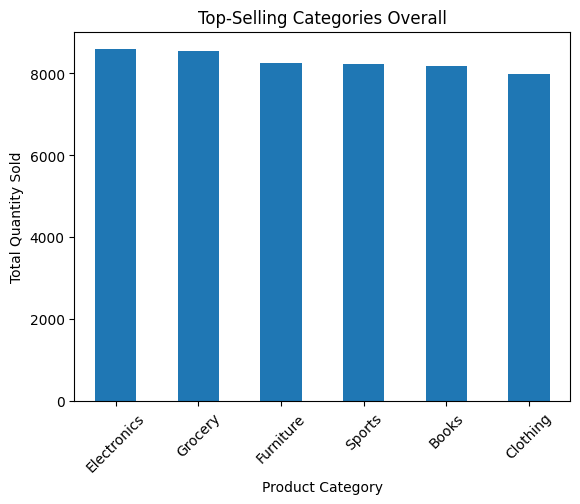

In [39]:
#a. Overall Top-Selling Category (Bar Chart)
import matplotlib.pyplot as plt

top_category_overall.plot(kind='bar', x='product_category', y='qty', legend=False)
plt.title('Top-Selling Categories Overall')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


In [40]:
# !pip install seaborn

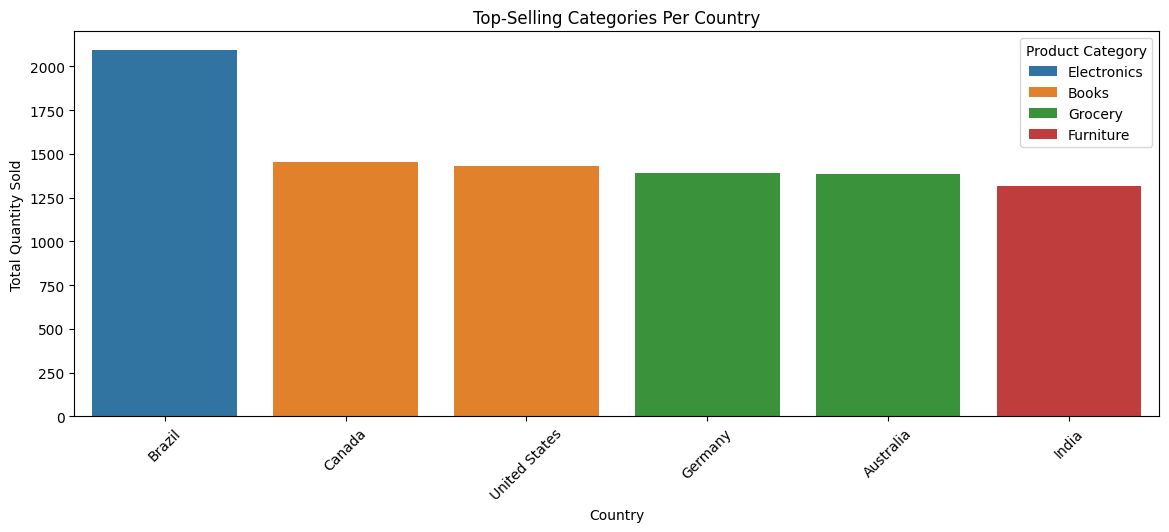

In [47]:
#b. Top-Selling Category Per Country (Bar Chart)
import seaborn as sns

plt.figure(figsize=(14, 5))
sns.barplot(x='country', y='qty', hue='product_category', data=top_category_per_country)
plt.title('Top-Selling Categories Per Country')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()


## Popularity of Products Throughout the Year (Overall and Per Country)

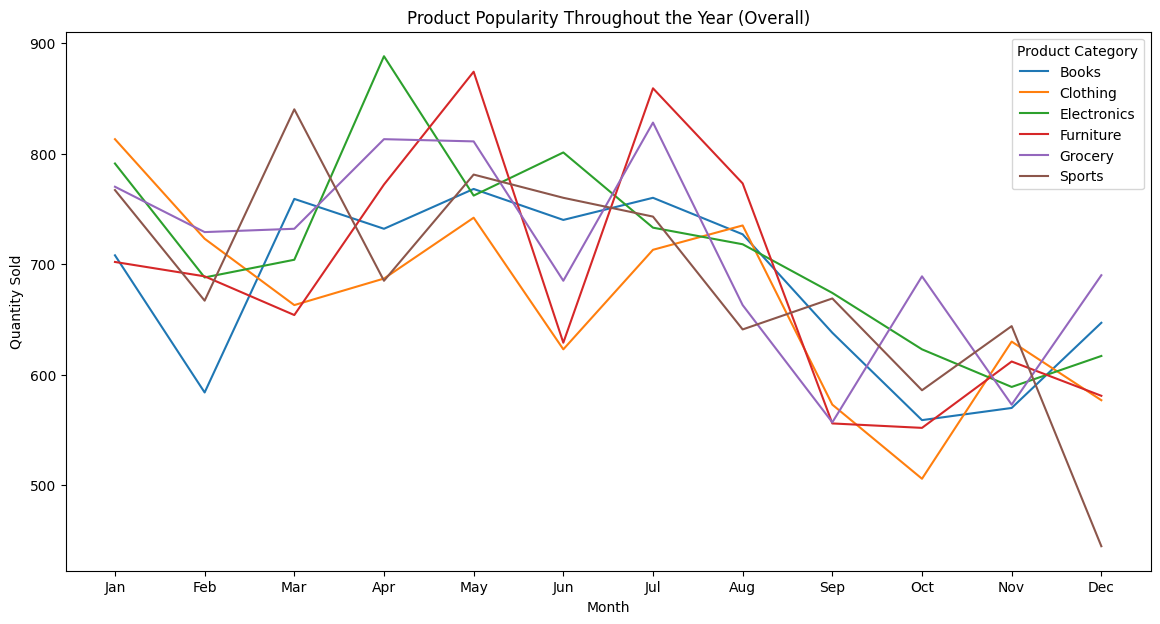

In [54]:
#Line Chart for Overall Product Popularity Throughout the Year
product_popularity_overall.plot(kind='line', figsize=(14, 7))
plt.title('Product Popularity Throughout the Year (Overall)')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Product Category')
plt.show()


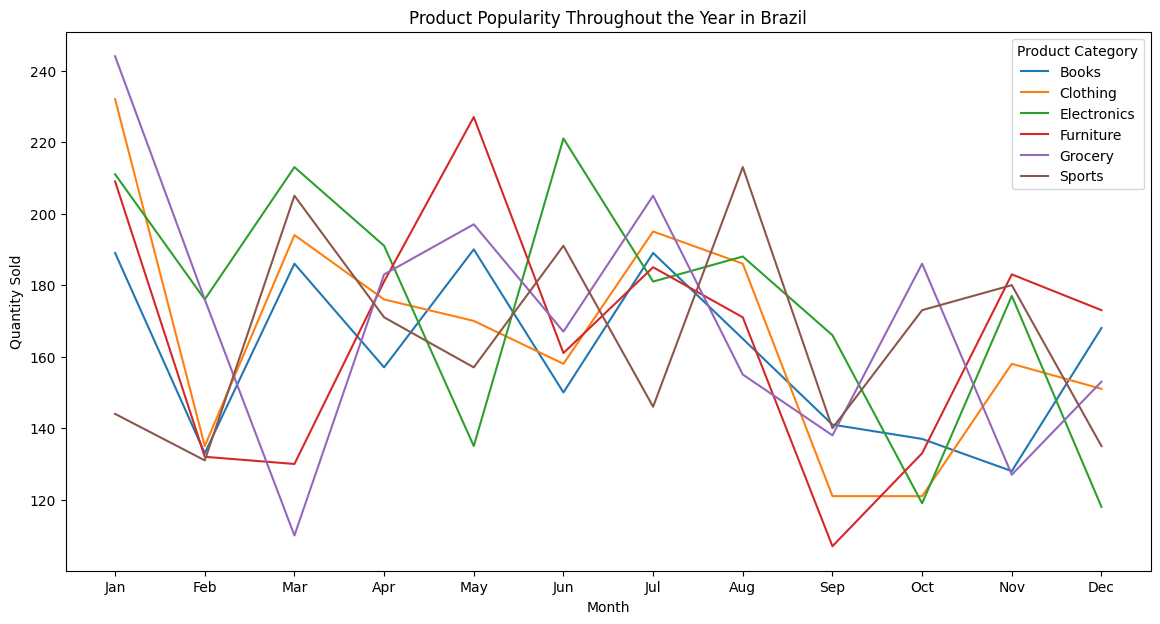

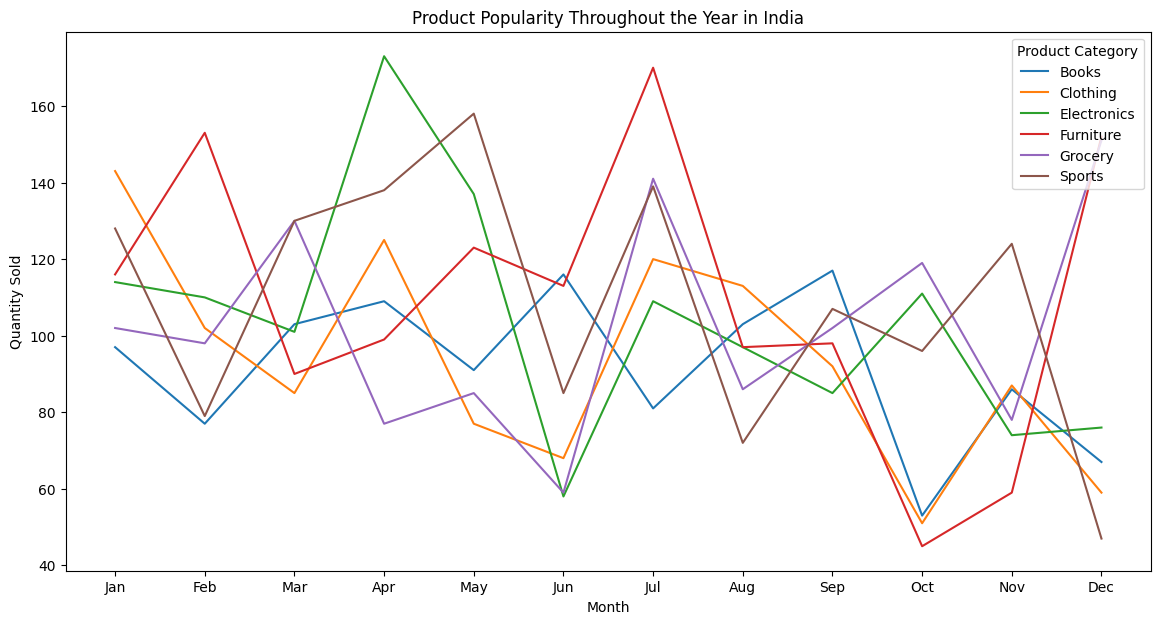

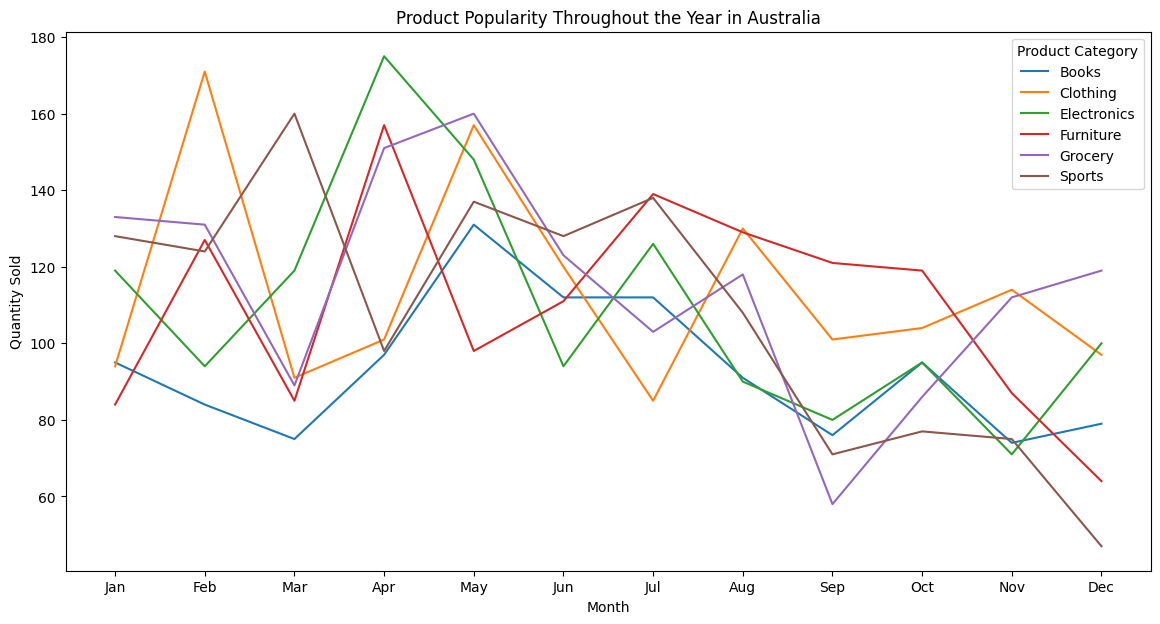

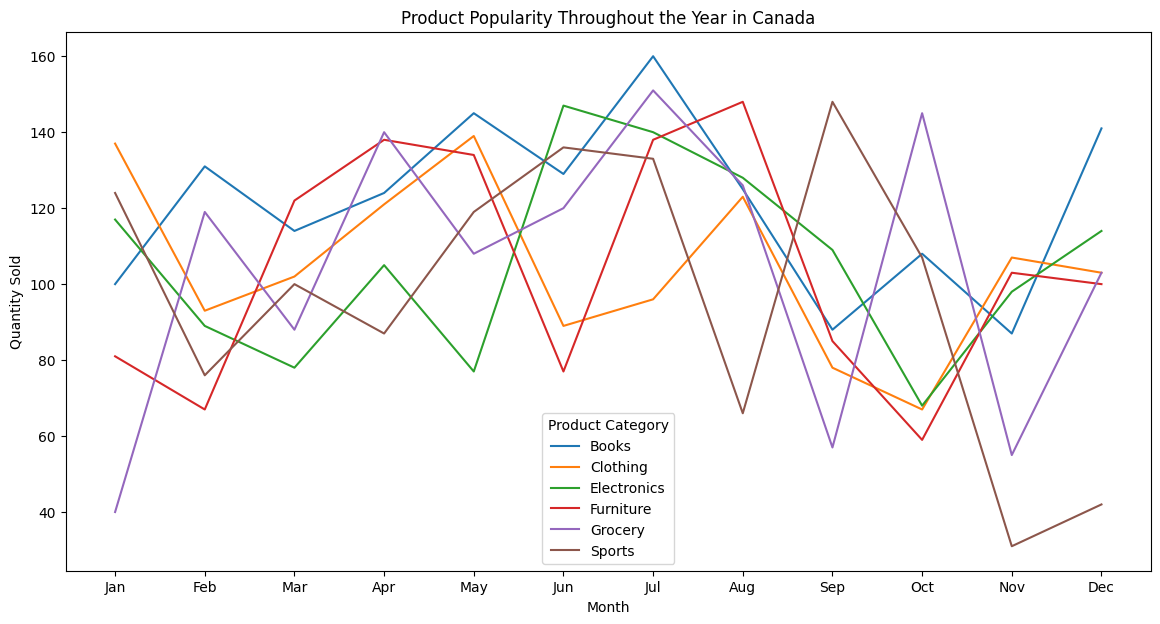

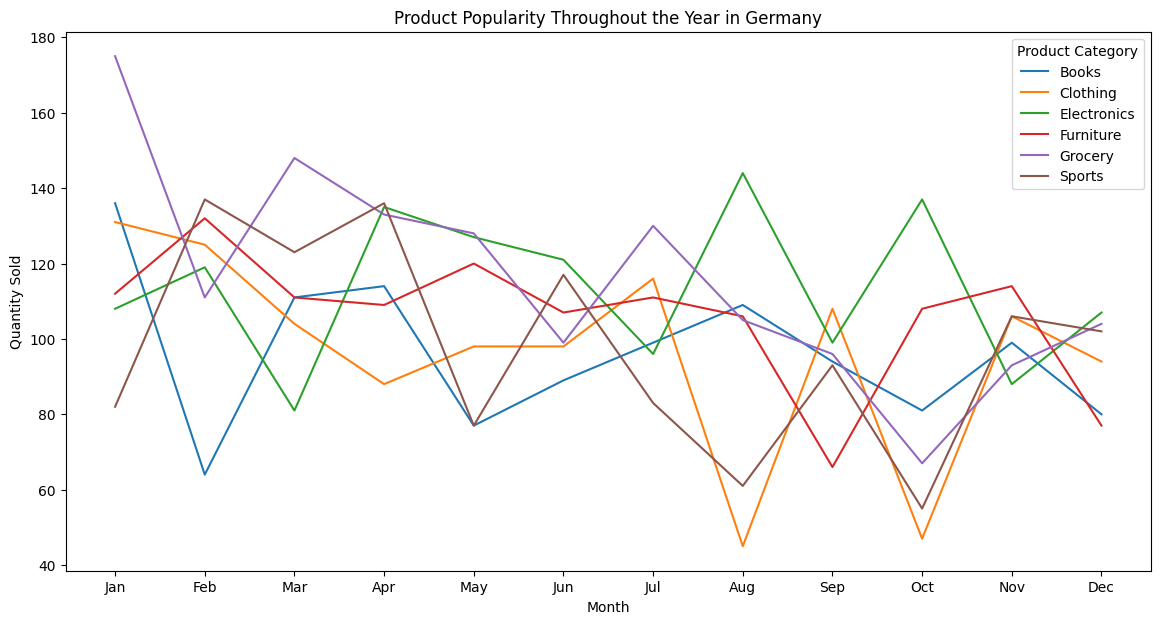

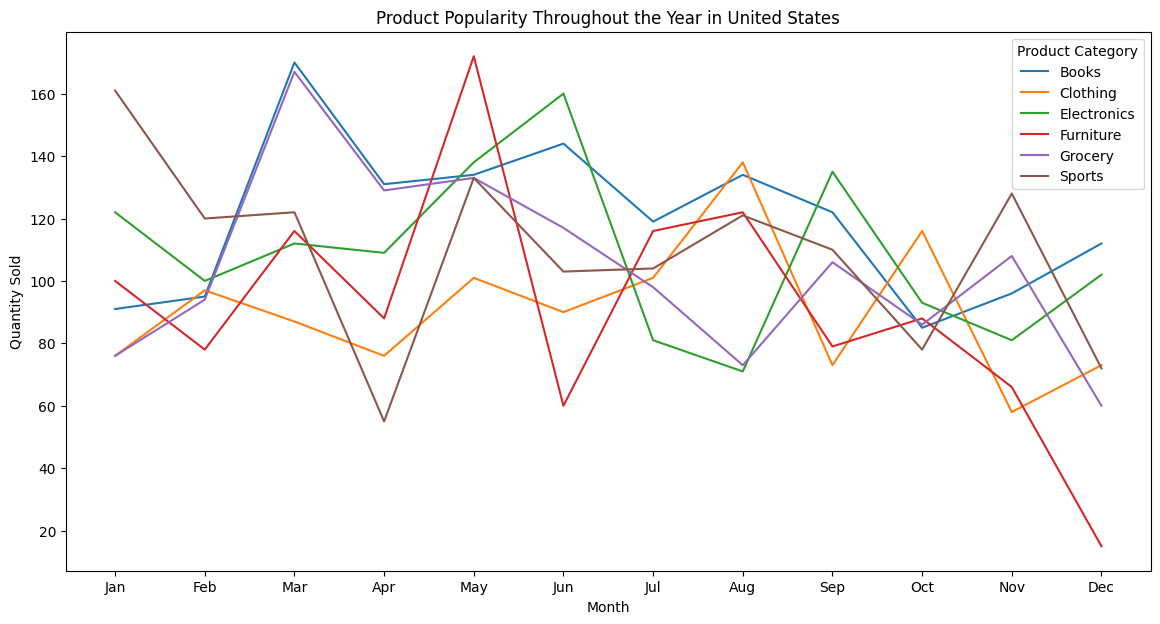

In [43]:
#Line Chart for Product Popularity Per Country
for country in df['country'].unique():
    df_country = df[df['country'] == country]
    product_popularity = df_country.groupby(['month', 'product_category'])['qty'].sum().unstack().fillna(0)
    
    product_popularity.plot(kind='line', figsize=(14, 7))
    plt.title(f'Product Popularity Throughout the Year in {country}')
    plt.xlabel('Month')
    plt.ylabel('Quantity Sold')
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(title='Product Category')
    plt.show()


##  Locations with the Highest Traffic of Sales

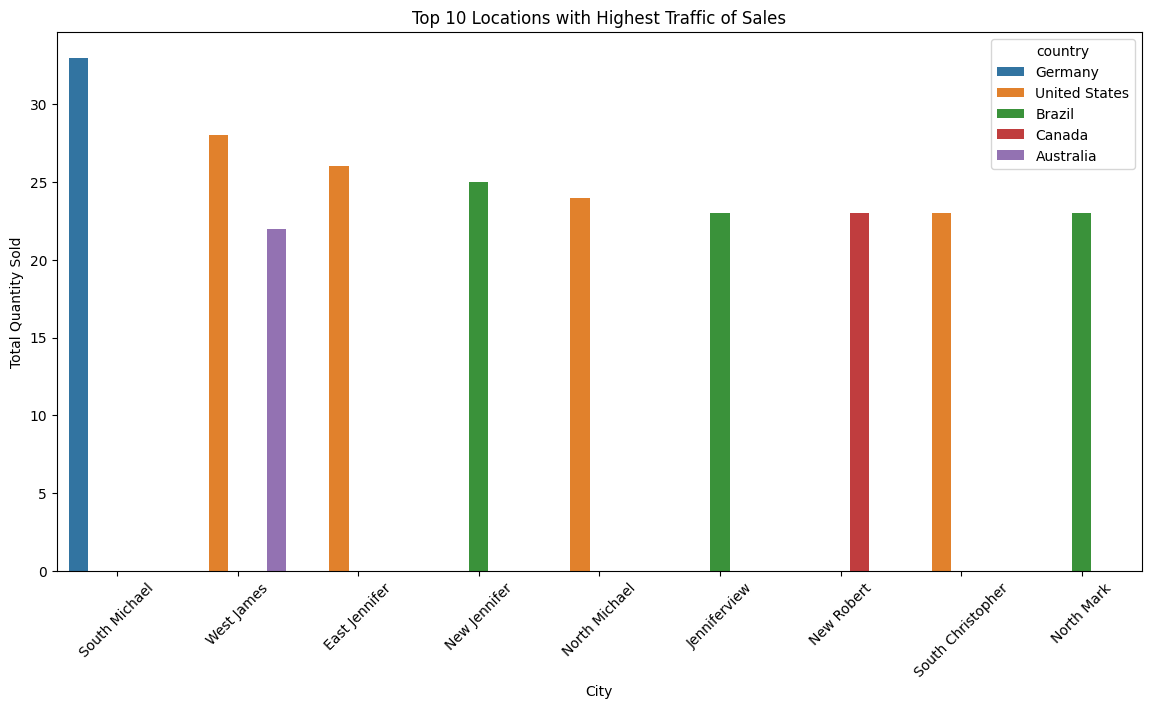

In [44]:
#Bar Chart for Locations with the Highest Traffic of Sales:
top_locations = highest_traffic_locations.head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x='city', y='qty', hue='country', data=top_locations)
plt.title('Top 10 Locations with Highest Traffic of Sales')
plt.xlabel('City')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


## Times with the Highest Traffic of Sales (Overall and Per Country)

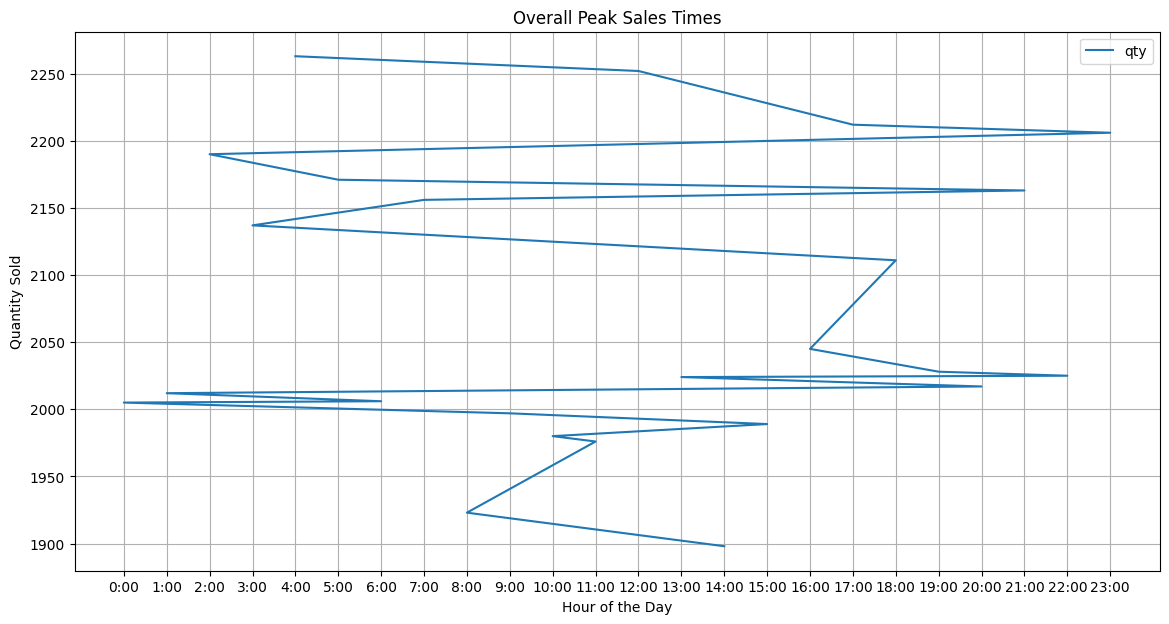

In [45]:

#Line Chart for Overall Peak Sales Times:
peak_times_overall.plot(kind='line', x='hour', y='qty', figsize=(14, 7))
plt.title('Overall Peak Sales Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Quantity Sold')
plt.xticks(ticks=range(0, 24), labels=[f'{i}:00' for i in range(24)])
plt.grid(True)
plt.show()



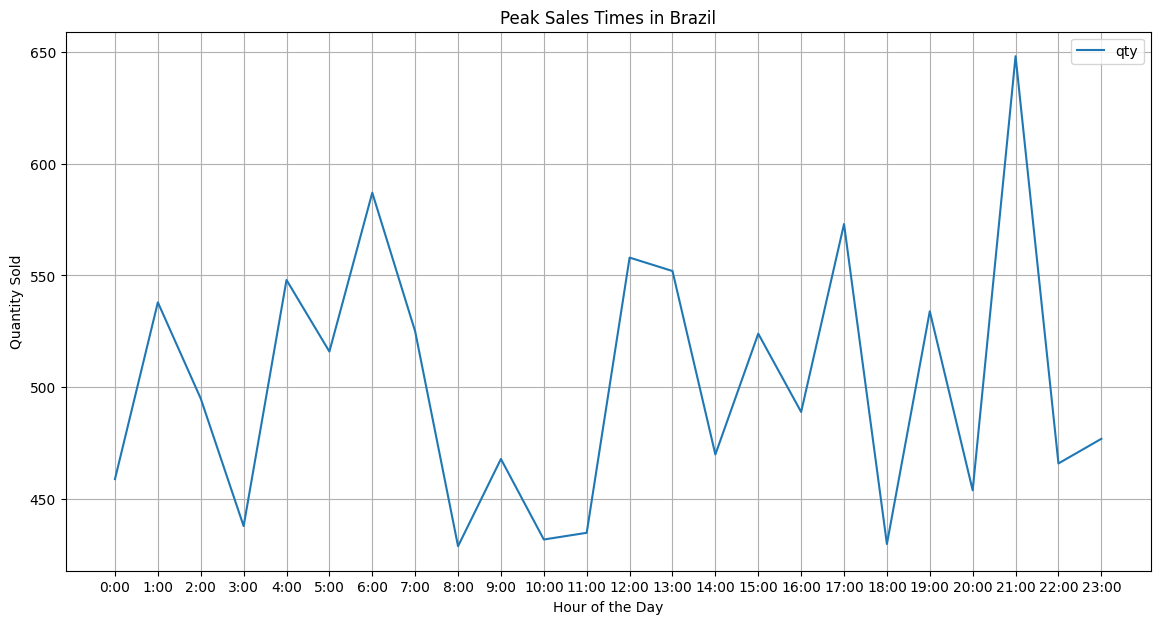

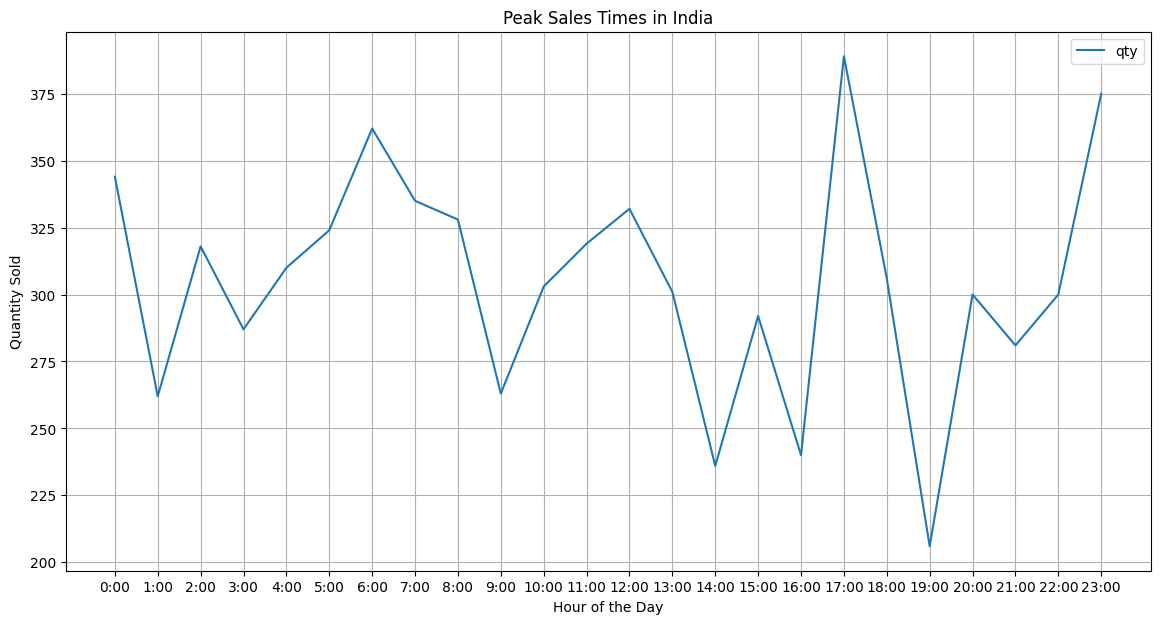

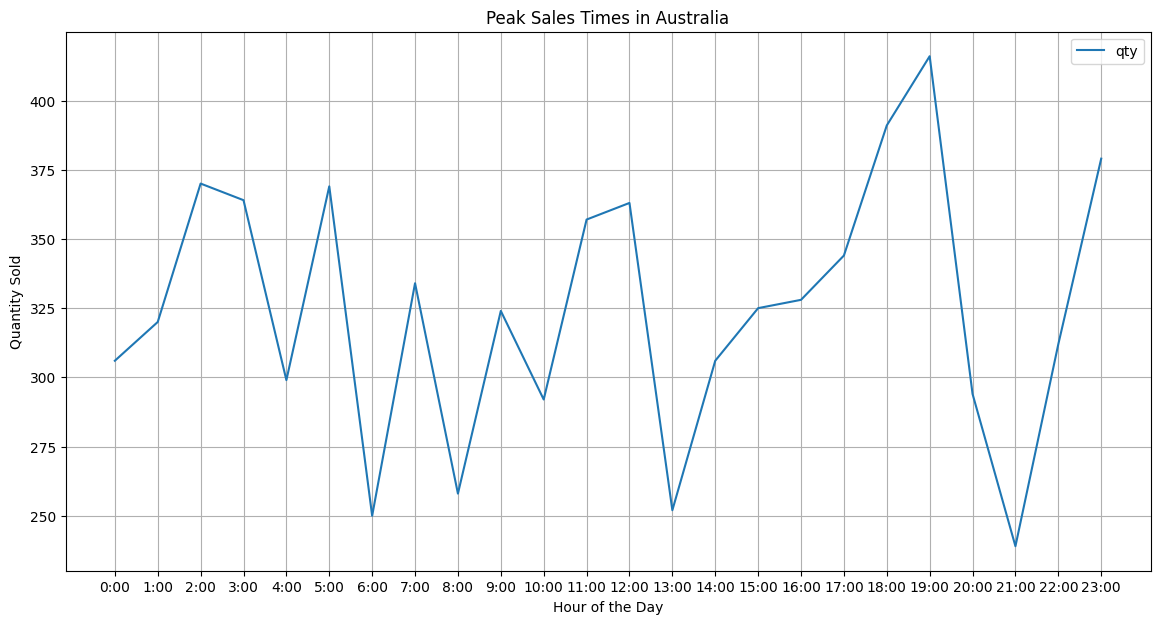

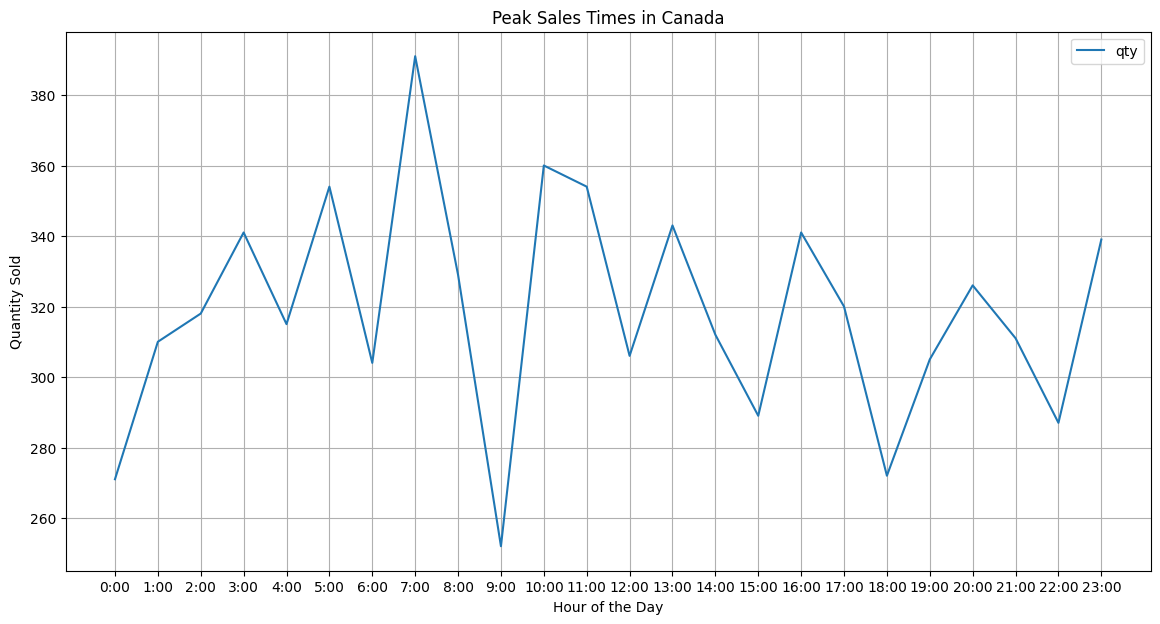

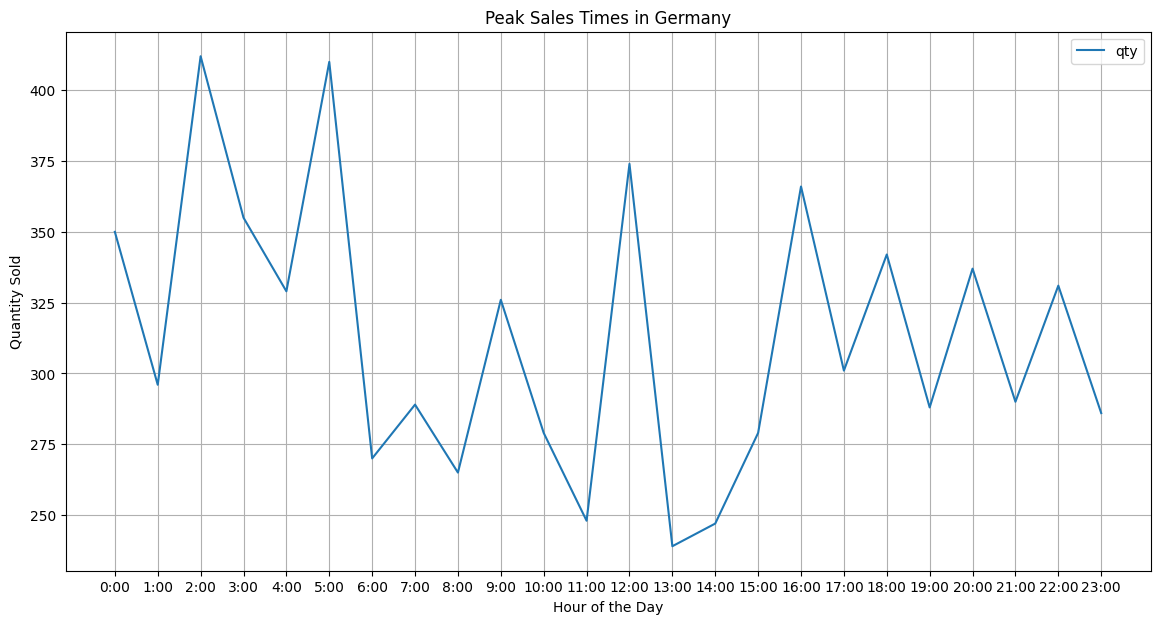

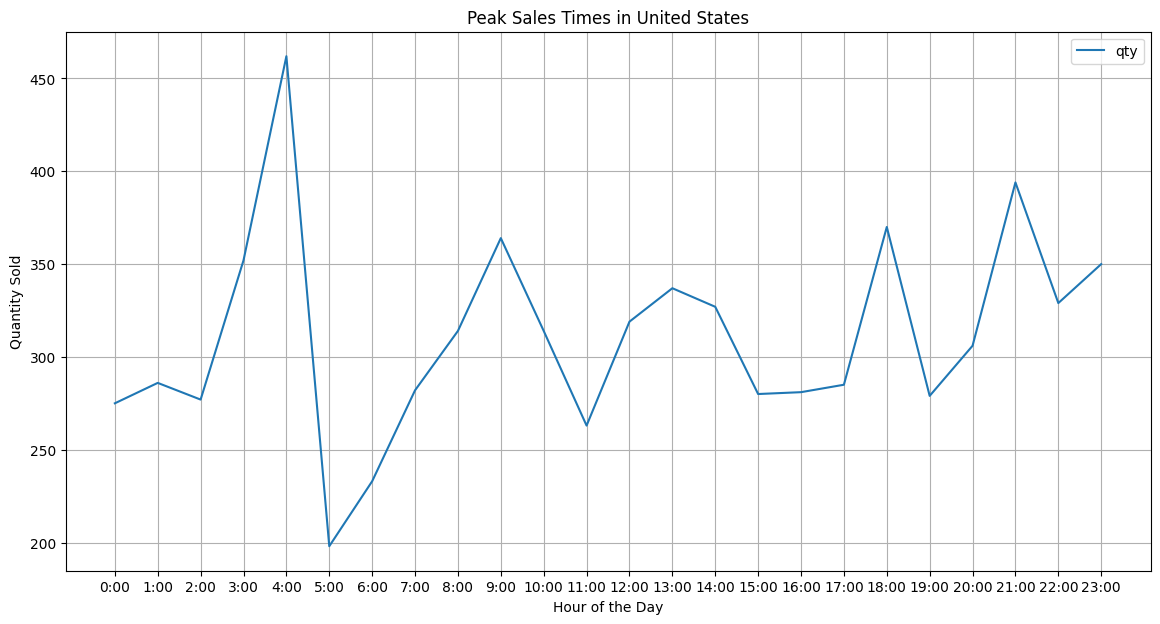

In [46]:
#Line Chart for Peak Sales Times Per Country
for country in df['country'].unique():
    df_country = df[df['country'] == country]
    peak_times = df_country.groupby('hour')['qty'].sum().reset_index()
    
    peak_times.plot(kind='line', x='hour', y='qty', figsize=(14, 7))
    plt.title(f'Peak Sales Times in {country}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Quantity Sold')
    plt.xticks(ticks=range(0, 24), labels=[f'{i}:00' for i in range(24)])
    plt.grid(True)
    plt.show()
